In [59]:
import numpy as np
import tqdm.notebook as pbar

from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
np.random.seed(42)
N = 7

# Алгоритм 3

## 1. $\pi_n$

In [61]:
m = 2**N

t = np.linspace(0,1,m+1)
Wt = np.cumsum(np.random.randn(t.shape[0])) / np.sqrt(t.shape[0])

Text(0.5, 1.0, 'm = 2^7')

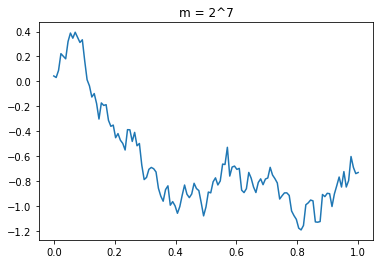

In [62]:
plt.plot(t, Wt)
plt.title(f"m = 2^{N}")

## 2. $\pi_{n+1}$

In [63]:
n1 = N + 1
m1 = 2**n1 + 1

t1 = np.linspace(0,1,m1+1)
Wt1 = np.zeros(t1.shape)

for k in pbar.trange(m-1):
    Wt1[2*k]     = Wt[k]
    Wt1[2*k + 1] = (
            (Wt[k] + Wt[k+1]) / 2 +
            np.random.randn() * (2 ** (-N/2-1))
    )

Wt1[-1] = Wt[-1]

  0%|          | 0/127 [00:00<?, ?it/s]

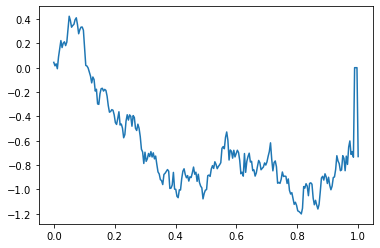

In [64]:
plt.plot(t1, Wt1)

## 3. compare

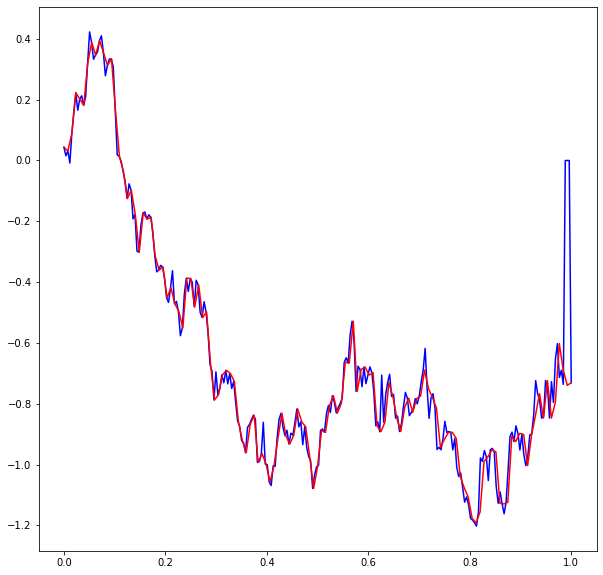

In [65]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(t1,Wt1,'b-')
ax.plot(t,Wt, 'r-')

# Розклад за функціями Хаара

In [66]:
# def indicator(t,a,b):
#     return a <= t < b
#
#
# def haar(t,k,n):
#     assert 0 <= t <= 1, f"wrong time interval t={t}"
#     denom = 2 ** n
#     numr1 = 2 * (k-1)
#     numr2 = 2*k - 1
#     numr3 = 2*k
#     return (2**((n-1)/2)) * (
#         indicator(
#             t, numr1/denom, numr2/denom
#         ) - indicator(
#         t, numr2/denom, numr3/denom
#     )
#     )


def s(t,k,n):
    # haar_to_int = lambda t: haar(t,k,n)
    # return integrate.quad(haar_to_int, 0, t)[0]

    denom = 2 ** (n)
    numr1 = (2 * (k-1)) / denom
    numr2 = (2*k - 1) / denom
    numr3 = (2*k) / denom

    if   0     <= t < numr1:
        return 0
    elif numr1 <= t < numr2:
        return numr2 - t
    elif numr2 <= t < numr3:
        return 2*numr2 - 1 - t
    elif numr3 <= t <= 1:
        return 2*numr2 - numr3 - numr1
    else:
        raise AssertionError(f"wrong time interval t={t}")


def w(t,n):
    norm_vec = np.random.randn(2**n-1)
    s_vec = np.array(list(map(
        lambda k: s(t,k,n),
        list(range(1,2**n))
    )))
    return np.dot(s_vec, norm_vec)

In [74]:
w2 = np.array([
    w(t_i,N) for t_i in t
]).cumsum()

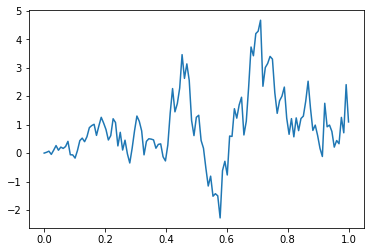

In [75]:
plt.plot(t, w2)

# Метод Вінера

In [76]:
def phi(t,k):
    return (np.sqrt(2) *
            np.sin(np.pi * k * t) /
            (np.pi * k))


def w(t, m):
    start = t * np.random.randn()
    phi_vec = np.array(list(map(
        lambda k: phi(t,k),
        list(range(1,m))
    )))
    norm_vec = np.random.randn(m-1)
    return (
            start +
            np.dot(phi_vec, norm_vec)
            )

In [77]:
w3 = np.array([
    w(t_i,N) for t_i in t
]).cumsum()

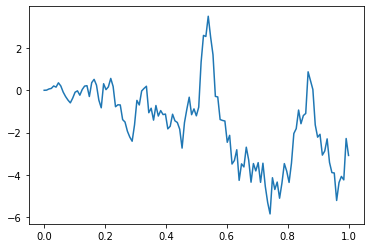

In [78]:
plt.plot(t, w3)